# Facilitated Machine Learning Models for Karyotyping in the Patients with Chromosomal Abnormalities: Retrospective Study

- **Chuan Yang**, MD, PhD Student
- Mentor: **Yanyan Zhao**, MD, PhD
- Shengjing Hospital of China Medical University

# Chr X vs Chr X q21 CNV

# Modules

In [1]:
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sb

from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.model_selection import KFold

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow import keras

from os import walk

import time
import datetime

import json

%matplotlib inline

C:\Anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


In [2]:
iterationNumber = 3

# 1. Read the File to Acquire the Filename

In [3]:
with open('data_X_train_name.json') as json_file:
    X_train_name = json.load(json_file)
X_train_name

{'chr_x': {'0': ['D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_x\\191128-del(X)(p22)-10L.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_x\\191128-del(X)(p22)-11L.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_x\\191128-del(X)(p22)-12L.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_x\\191128-del(X)(p22)-13L.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_x\\191128-del(X)(p22)-15L.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_x\\191128-del(X)(p22)-16L.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_x\\191128-del(X)(p22)-17L.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_x\\191128-del(X)(p22)-18L.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_x\\191128-del(X)(p2

In [4]:
with open('data_X_test_name.json') as json_file:
    X_test_name = json.load(json_file)

In [5]:
with open('data_theWhole.json') as json_file:
    theWhole = json.load(json_file)
theWhole

{'chr_x': ['D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_x\\191128-del(X)(p22)-10L.bmp',
  'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_x\\191128-del(X)(p22)-11L.bmp',
  'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_x\\191128-del(X)(p22)-12L.bmp',
  'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_x\\191128-del(X)(p22)-13L.bmp',
  'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_x\\191128-del(X)(p22)-14L.bmp',
  'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_x\\191128-del(X)(p22)-15L.bmp',
  'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_x\\191128-del(X)(p22)-16L.bmp',
  'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_x\\191128-del(X)(p22)-17L.bmp',
  'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_x\\191128-del(X)(p22)-18L.bmp',
 

# 3. Iteration

## 3.1 Image Input

### 3.1.x Display the Split Method

In [6]:
type(X_train_name)

dict

In [7]:
X_train_name.keys()

dict_keys(['chr_x', 'chr_x_q21_cnv'])

In [8]:
file_k_fold = open('KFold_Round_'+str(iterationNumber)+'.txt', 'w')

print('Iteration No. ', iterationNumber)
file_k_fold.write('Iteration No. %s\n\n' % iterationNumber)


for chrNo in theWhole.keys():
    print(chrNo)
    file_k_fold.write('%s\n' % chrNo)
    print('   Train: ')
    file_k_fold.write('Train: \n')
    for item in X_train_name[chrNo][str(iterationNumber)]:
        print('       ', item.split('\\')[-1])
        file_k_fold.write('      %s\n' % item.split('\\')[-1])
    print('   Test: ')
    file_k_fold.write('Test: \n')
    for item in X_test_name[chrNo][str(iterationNumber)]:
        print('       ', item.split('\\')[-1])
        file_k_fold.write('      %s\n' % item.split('\\')[-1])
    file_k_fold.write('\n')
        
file_k_fold.close()

Iteration No.  3
chr_x
   Train: 
        191128-del(X)(p22)-10L.bmp
        191128-del(X)(p22)-11L.bmp
        191128-del(X)(p22)-12L.bmp
        191128-del(X)(p22)-14L.bmp
        191128-del(X)(p22)-15L.bmp
        191128-del(X)(p22)-16L.bmp
        191128-del(X)(p22)-17L.bmp
        191128-del(X)(p22)-18L.bmp
        191128-del(X)(p22)-20L.bmp
        191128-del(X)(p22)-21L.bmp
        191128-del(X)(p22)-22L.bmp
        191128-del(X)(p22)-2L.bmp
        191128-del(X)(p22)-4L.bmp
        191128-del(X)(p22)-6L.bmp
        191128-del(X)(p22)-7L.bmp
        191128-del(X)(p22)-8L.bmp
        191128-del(X)(p22)-9L.bmp
        192478-delXq21-10L.bmp
        192478-delXq21-11L.bmp
        192478-delXq21-14L.bmp
        192478-delXq21-17L.bmp
        192478-delXq21-18L.bmp
        192478-delXq21-19L.bmp
        192478-delXq21-1L.bmp
        192478-delXq21-21L.bmp
        192478-delXq21-23L.bmp
        192478-delXq21-24L.bmp
        192478-delXq21-25L.bmp
        192478-delXq21-27L.bmp
      

### 3.1.1. Helper Functions

In [9]:
def extractData(image):
    x = image.size[0]
    y = image.size[1]
    
    matrix = []
    rgb_matrix = []

    for i in range(x):
        matrix.append([])
        rgb_matrix.append([])
        
        for j in range(y):
            r, g, b = image.getpixel((j, i))            
            value = r * 299.0/1000 + g * 587.0/1000 + b * 114.0/1000
            value = int(value)
            matrix[i].append(value)
            rgb_matrix[i].append((r,g,b))
    return matrix, rgb_matrix

In [10]:
def imageReconstruct(matrix):
    df = np.array(matrix, dtype=np.uint8)
    img = Image.fromarray(df, 'RGB')
    img.save('image.png')
    return img

### 3.1.2. Assignment of Training Data

#### 3.1.2.1 Training: Image Object Assignment

In [11]:
image = {}

# 定义容纳图片对象的dictionary类型的变量image

i = 0

for chrNo in theWhole.keys():
    image[chrNo] = []
    for case in X_train_name[chrNo][str(iterationNumber)]:
        
        # 上面一行第二个中括号内为split的序号，0为第0次split分法
        
        img = Image.open(case)
        image[chrNo].append(img)
        
        # image字典接受的是图片对象

#### 3.1.2.2. Training: Data Extraction from Images

#### - Training Set Data: 将图像对象转变为矩阵数值

In [12]:
data = {}
#rgb_data = {}

for chrNo in image.keys():
    data[chrNo] = []; 
    #rgb_data[chrNo] = []
    for case in image[chrNo]:
        grey, rgb = extractData(case)
        data[chrNo].append(grey)
        #rgb_data[chrNo].append(rgb)

In [13]:
array = {}

for chrNo in data.keys():
    array[chrNo] = []
    for case in data[chrNo]:            
        array[chrNo].append(case)

x_train_list = []
y_train_list = []

for y, x in array.items():    
    for x_item in x:
        x_train_list.append(x_item)
        y_train_list.append(y)
        
        # 将图像数据赋值给x_train_list;
        # 将标签数据赋值给y_train_list.

### 3.1.3. Assignment of Testing Data

#### 3.1.3.1. Testing: Image Object Assignment

In [14]:
# 方法同前面的Training Set

image = {}
i = 0

for chrNo in theWhole.keys():
    image[chrNo] = []
    for case in X_test_name[chrNo][str(iterationNumber)]: # Change here for different iterations!!!!!
        
        # 上面一行第二个中括号内为split的序号，0为第0次split分法
        
        img = Image.open(case)
        image[chrNo].append(img)

#### 3.1.3.2. Testing: Data Extraction from Images

In [15]:
data = {}
#rgb_data = {}

for chrNo in image.keys():
    data[chrNo] = []; 
    #rgb_data[chrNo] = []
    for case in image[chrNo]:
        grey, rgb = extractData(case)
        data[chrNo].append(grey)
        #rgb_data[chrNo].append(rgb)

In [16]:
array = {}

for chrNo in data.keys():
    array[chrNo] = []
    for case in data[chrNo]:            
        array[chrNo].append(case)

x_test_list = []
y_test_list = []

for y, x in array.items():    
    for x_item in x:
        x_test_list.append(x_item)
        y_test_list.append(y)

### 3.1.4. ChromConvert

In [17]:
chromConvert = {
               'chr_x': 0, 
               'chr_x_q21_cnv': 1
               }

In [18]:
chromConvert_reverse = {
                0: 'chr_x', 
                1: 'chr_x_q21_cnv'
               }

In [19]:
# 将染色体序号和异常核型名称更换为序号，序号定义在程序开始部分

y_train_digital_list = []
for item in y_train_list:
    y_train_digital_list.append(chromConvert[item])
    
y_test_digital_list = []
for item in y_test_list:
    y_test_digital_list.append(chromConvert[item])

### 3.1.5. Change to Numpy Array

In [20]:
X_train = np.array(x_train_list)
y_train = np.array(y_train_digital_list)

In [21]:
X_test = np.array(x_test_list)
y_test = np.array(y_test_digital_list)

In [22]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1])

In [23]:
len(X_train)

191

In [24]:
X_train[0].shape

(300, 300)

## 3.2. Convolutional Neural Network

### 3.2.1 Data Preparation

In [25]:
X_train = X_train.reshape(-1, 300, 300, 1)
X_test = X_test.reshape(-1, 300, 300, 1)

### 3.2.3 Training Model Design

In [26]:
model = Sequential()

In [27]:
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(300, 300, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

In [28]:
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(1024, activation='relu'))
model.add(Dense(2, activation='sigmoid'))

### 3.2.4. Tensorboard Initilization

In [29]:
%load_ext tensorboard
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

### 3.2.5. Compile the modal

In [30]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

### 3.2.6. Fitting (拟合)

In [31]:
model.fit(X_train, y_train, epochs=500, batch_size=64, verbose=1, 
          validation_data=(X_test, y_test),
          callbacks=[tensorboard_callback])

Epoch 1/500
3/3 [==============================] - 6s 1s/step - loss: 1985.8965 - accuracy: 0.5812 - val_loss: 33.9932 - val_accuracy: 0.7917
Epoch 2/500
3/3 [==============================] - 0s 155ms/step - loss: 61.4000 - accuracy: 0.5916 - val_loss: 19.6618 - val_accuracy: 0.7917
Epoch 3/500
3/3 [==============================] - 0s 152ms/step - loss: 31.3160 - accuracy: 0.6283 - val_loss: 3.5076 - val_accuracy: 0.7917
Epoch 4/500
3/3 [==============================] - 1s 205ms/step - loss: 3.1361 - accuracy: 0.6597 - val_loss: 2.5859 - val_accuracy: 0.7917
Epoch 5/500
3/3 [==============================] - 0s 149ms/step - loss: 1.0239 - accuracy: 0.8482 - val_loss: 0.1222 - val_accuracy: 1.0000
Epoch 6/500
3/3 [==============================] - 0s 154ms/step - loss: 0.9462 - accuracy: 0.9215 - val_loss: 0.0474 - val_accuracy: 1.0000
Epoch 7/500
3/3 [==============================] - 0s 145ms/step - loss: 0.5696 - accuracy: 0.9267 - val_loss: 0.1346 - val_accuracy: 0.9792
Epoch 8/5

3/3 [==============================] - 0s 141ms/step - loss: 3.4603e-05 - accuracy: 1.0000 - val_loss: 7.0532e-07 - val_accuracy: 1.0000
Epoch 58/500
3/3 [==============================] - 0s 138ms/step - loss: 3.2151e-05 - accuracy: 1.0000 - val_loss: 6.1591e-07 - val_accuracy: 1.0000
Epoch 59/500
3/3 [==============================] - 0s 135ms/step - loss: 2.6698e-05 - accuracy: 1.0000 - val_loss: 6.4571e-07 - val_accuracy: 1.0000
Epoch 60/500
3/3 [==============================] - 0s 151ms/step - loss: 2.3621e-05 - accuracy: 1.0000 - val_loss: 6.7800e-07 - val_accuracy: 1.0000
Epoch 61/500
3/3 [==============================] - 0s 137ms/step - loss: 2.1273e-05 - accuracy: 1.0000 - val_loss: 6.8545e-07 - val_accuracy: 1.0000
Epoch 62/500
3/3 [==============================] - 0s 146ms/step - loss: 1.7533e-05 - accuracy: 1.0000 - val_loss: 6.6558e-07 - val_accuracy: 1.0000
Epoch 63/500
3/3 [==============================] - 0s 142ms/step - loss: 1.6890e-05 - accuracy: 1.0000 - val_los

3/3 [==============================] - 0s 145ms/step - loss: 1.6825e-06 - accuracy: 1.0000 - val_loss: 7.6989e-08 - val_accuracy: 1.0000
Epoch 112/500
3/3 [==============================] - 0s 139ms/step - loss: 1.6301e-06 - accuracy: 1.0000 - val_loss: 7.2022e-08 - val_accuracy: 1.0000
Epoch 113/500
3/3 [==============================] - 0s 179ms/step - loss: 1.5970e-06 - accuracy: 1.0000 - val_loss: 8.1956e-08 - val_accuracy: 1.0000
Epoch 114/500
3/3 [==============================] - 0s 135ms/step - loss: 1.5833e-06 - accuracy: 1.0000 - val_loss: 8.6923e-08 - val_accuracy: 1.0000
Epoch 115/500
3/3 [==============================] - 0s 137ms/step - loss: 1.5334e-06 - accuracy: 1.0000 - val_loss: 8.6923e-08 - val_accuracy: 1.0000
Epoch 116/500
3/3 [==============================] - 0s 138ms/step - loss: 1.5434e-06 - accuracy: 1.0000 - val_loss: 7.6989e-08 - val_accuracy: 1.0000
Epoch 117/500
3/3 [==============================] - 0s 130ms/step - loss: 1.4310e-06 - accuracy: 1.0000 - v

3/3 [==============================] - 0s 151ms/step - loss: 6.5469e-07 - accuracy: 1.0000 - val_loss: 9.6857e-08 - val_accuracy: 1.0000
Epoch 166/500
3/3 [==============================] - 0s 150ms/step - loss: 6.4845e-07 - accuracy: 1.0000 - val_loss: 9.6857e-08 - val_accuracy: 1.0000
Epoch 167/500
3/3 [==============================] - 1s 196ms/step - loss: 6.3535e-07 - accuracy: 1.0000 - val_loss: 9.6857e-08 - val_accuracy: 1.0000
Epoch 168/500
3/3 [==============================] - 0s 137ms/step - loss: 6.2162e-07 - accuracy: 1.0000 - val_loss: 9.6857e-08 - val_accuracy: 1.0000
Epoch 169/500
3/3 [==============================] - 1s 235ms/step - loss: 6.2162e-07 - accuracy: 1.0000 - val_loss: 9.4374e-08 - val_accuracy: 1.0000
Epoch 170/500
3/3 [==============================] - 0s 140ms/step - loss: 6.1475e-07 - accuracy: 1.0000 - val_loss: 9.6857e-08 - val_accuracy: 1.0000
Epoch 171/500
3/3 [==============================] - 0s 142ms/step - loss: 6.0789e-07 - accuracy: 1.0000 - v

3/3 [==============================] - 0s 155ms/step - loss: 3.4576e-07 - accuracy: 1.0000 - val_loss: 1.3908e-07 - val_accuracy: 1.0000
Epoch 220/500
3/3 [==============================] - 0s 142ms/step - loss: 3.3952e-07 - accuracy: 1.0000 - val_loss: 1.4156e-07 - val_accuracy: 1.0000
Epoch 221/500
3/3 [==============================] - 0s 144ms/step - loss: 3.3391e-07 - accuracy: 1.0000 - val_loss: 1.4156e-07 - val_accuracy: 1.0000
Epoch 222/500
3/3 [==============================] - 0s 149ms/step - loss: 3.2454e-07 - accuracy: 1.0000 - val_loss: 1.3908e-07 - val_accuracy: 1.0000
Epoch 223/500
3/3 [==============================] - 0s 146ms/step - loss: 3.2829e-07 - accuracy: 1.0000 - val_loss: 1.3659e-07 - val_accuracy: 1.0000
Epoch 224/500
3/3 [==============================] - 0s 142ms/step - loss: 3.1643e-07 - accuracy: 1.0000 - val_loss: 1.4156e-07 - val_accuracy: 1.0000
Epoch 225/500
3/3 [==============================] - 0s 156ms/step - loss: 3.1206e-07 - accuracy: 1.0000 - v

3/3 [==============================] - 0s 157ms/step - loss: 1.6290e-07 - accuracy: 1.0000 - val_loss: 2.2103e-07 - val_accuracy: 1.0000
Epoch 274/500
3/3 [==============================] - 0s 151ms/step - loss: 1.6165e-07 - accuracy: 1.0000 - val_loss: 2.1855e-07 - val_accuracy: 1.0000
Epoch 275/500
3/3 [==============================] - 2s 1s/step - loss: 1.5978e-07 - accuracy: 1.0000 - val_loss: 2.1607e-07 - val_accuracy: 1.0000
Epoch 276/500
3/3 [==============================] - 0s 150ms/step - loss: 1.5728e-07 - accuracy: 1.0000 - val_loss: 2.1607e-07 - val_accuracy: 1.0000
Epoch 277/500
3/3 [==============================] - 0s 151ms/step - loss: 1.5728e-07 - accuracy: 1.0000 - val_loss: 2.1855e-07 - val_accuracy: 1.0000
Epoch 278/500
3/3 [==============================] - 0s 142ms/step - loss: 1.5541e-07 - accuracy: 1.0000 - val_loss: 2.1855e-07 - val_accuracy: 1.0000
Epoch 279/500
3/3 [==============================] - 0s 148ms/step - loss: 1.5416e-07 - accuracy: 1.0000 - val_

3/3 [==============================] - 0s 156ms/step - loss: 1.0485e-07 - accuracy: 1.0000 - val_loss: 2.0365e-07 - val_accuracy: 1.0000
Epoch 328/500
3/3 [==============================] - 0s 152ms/step - loss: 1.0361e-07 - accuracy: 1.0000 - val_loss: 2.0613e-07 - val_accuracy: 1.0000
Epoch 329/500
3/3 [==============================] - 0s 147ms/step - loss: 1.0423e-07 - accuracy: 1.0000 - val_loss: 2.0862e-07 - val_accuracy: 1.0000
Epoch 330/500
3/3 [==============================] - 0s 142ms/step - loss: 1.0361e-07 - accuracy: 1.0000 - val_loss: 2.0365e-07 - val_accuracy: 1.0000
Epoch 331/500
3/3 [==============================] - 0s 143ms/step - loss: 1.0298e-07 - accuracy: 1.0000 - val_loss: 2.0116e-07 - val_accuracy: 1.0000
Epoch 332/500
3/3 [==============================] - 0s 142ms/step - loss: 1.0173e-07 - accuracy: 1.0000 - val_loss: 2.0116e-07 - val_accuracy: 1.0000
Epoch 333/500
3/3 [==============================] - 0s 146ms/step - loss: 1.0048e-07 - accuracy: 1.0000 - v

3/3 [==============================] - 0s 157ms/step - loss: 7.4896e-08 - accuracy: 1.0000 - val_loss: 1.6640e-07 - val_accuracy: 1.0000
Epoch 382/500
3/3 [==============================] - 0s 148ms/step - loss: 7.4896e-08 - accuracy: 1.0000 - val_loss: 1.6391e-07 - val_accuracy: 1.0000
Epoch 383/500
3/3 [==============================] - 0s 153ms/step - loss: 7.3647e-08 - accuracy: 1.0000 - val_loss: 1.6391e-07 - val_accuracy: 1.0000
Epoch 384/500
3/3 [==============================] - 0s 155ms/step - loss: 7.3023e-08 - accuracy: 1.0000 - val_loss: 1.6391e-07 - val_accuracy: 1.0000
Epoch 385/500
3/3 [==============================] - 0s 160ms/step - loss: 7.3023e-08 - accuracy: 1.0000 - val_loss: 1.6143e-07 - val_accuracy: 1.0000
Epoch 386/500
3/3 [==============================] - 0s 150ms/step - loss: 7.3023e-08 - accuracy: 1.0000 - val_loss: 1.6143e-07 - val_accuracy: 1.0000
Epoch 387/500
3/3 [==============================] - 0s 148ms/step - loss: 7.2399e-08 - accuracy: 1.0000 - v

3/3 [==============================] - 0s 145ms/step - loss: 5.8044e-08 - accuracy: 1.0000 - val_loss: 1.1176e-07 - val_accuracy: 1.0000
Epoch 436/500
3/3 [==============================] - 0s 148ms/step - loss: 5.8044e-08 - accuracy: 1.0000 - val_loss: 1.1176e-07 - val_accuracy: 1.0000
Epoch 437/500
3/3 [==============================] - 0s 153ms/step - loss: 5.8044e-08 - accuracy: 1.0000 - val_loss: 1.1176e-07 - val_accuracy: 1.0000
Epoch 438/500
3/3 [==============================] - 0s 151ms/step - loss: 5.6796e-08 - accuracy: 1.0000 - val_loss: 1.1176e-07 - val_accuracy: 1.0000
Epoch 439/500
3/3 [==============================] - 0s 149ms/step - loss: 5.6796e-08 - accuracy: 1.0000 - val_loss: 1.0927e-07 - val_accuracy: 1.0000
Epoch 440/500
3/3 [==============================] - 0s 153ms/step - loss: 5.7420e-08 - accuracy: 1.0000 - val_loss: 1.0927e-07 - val_accuracy: 1.0000
Epoch 441/500
3/3 [==============================] - 0s 145ms/step - loss: 5.6796e-08 - accuracy: 1.0000 - v

3/3 [==============================] - 0s 144ms/step - loss: 4.6810e-08 - accuracy: 1.0000 - val_loss: 8.4440e-08 - val_accuracy: 1.0000
Epoch 490/500
3/3 [==============================] - 0s 147ms/step - loss: 4.6186e-08 - accuracy: 1.0000 - val_loss: 8.4440e-08 - val_accuracy: 1.0000
Epoch 491/500
3/3 [==============================] - 0s 155ms/step - loss: 4.6810e-08 - accuracy: 1.0000 - val_loss: 8.1956e-08 - val_accuracy: 1.0000
Epoch 492/500
3/3 [==============================] - 0s 152ms/step - loss: 4.6186e-08 - accuracy: 1.0000 - val_loss: 8.1956e-08 - val_accuracy: 1.0000
Epoch 493/500
3/3 [==============================] - 0s 147ms/step - loss: 4.6186e-08 - accuracy: 1.0000 - val_loss: 8.1956e-08 - val_accuracy: 1.0000
Epoch 494/500
3/3 [==============================] - 0s 141ms/step - loss: 4.5562e-08 - accuracy: 1.0000 - val_loss: 8.1956e-08 - val_accuracy: 1.0000
Epoch 495/500
3/3 [==============================] - 0s 150ms/step - loss: 4.5562e-08 - accuracy: 1.0000 - v

### 3.2.7 Summary

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 32)      320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 78400)             0

### 3.2.8. Tensorboard Display

In [33]:
%tensorboard --logdir logs/fit

Reusing TensorBoard on port 6006 (pid 19168), started 5:30:20 ago. (Use '!kill 19168' to kill it.)

## 3.8 Save the Model

In [34]:
model.save('saved_model/model_Chr_X_cnn_iteration_'+str(iterationNumber))

INFO:tensorflow:Assets written to: saved_model/model_Chr_X_cnn_iteration_3\assets


## 3.9 Load the Model

In [35]:
model_reload = keras.models.load_model('saved_model/model_Chr_X_cnn_iteration_'+str(iterationNumber))

## 3.10. Performance Measures

### 3.10.0. Accuracy

In [36]:
loss, acc = model_reload.evaluate(X_test, y_test, verbose=0)
print('Test Accuracy: %.3f' % acc)

Test Accuracy: 1.000


In [37]:
len(X_test)

48

In [38]:
y_predict = model_reload.predict(X_test)

In [39]:
len(y_predict)

48

In [40]:
# The number 32 means the type number of all chromosome class number inlcuding abnormal ones
y_predict_filtered = []

for sample in y_predict:
    maximum = 0
    indicator = 0
    for i in range(2):
        if sample[i] > maximum:
            maximum = sample[i]
            indicator = i
    y_predict_filtered.append(indicator)        

In [41]:
len(y_predict_filtered)

48

In [42]:
label = ['chr_x', 'chr_x_q21_cnv']

label_convert = []

for i in range(2):
    label_convert.append(chromConvert_reverse[i])

### 3.10.1 Save y_test and y_predict

In [43]:
with open('data_y_test_value_iteration_' + str(iterationNumber) + '.npy', 'wb') as file_y_test_value:
    np.save(file_y_test_value, y_test)

In [44]:
with open('data_y_predict_value_iteration_' + str(iterationNumber) + '.npy', 'wb') as file_y_predict_value:
    np.save(file_y_predict_value, y_predict)

In [45]:
with open('data_y_predict_filtered_value_iteration_' + str(iterationNumber) + '.npy', 'wb') as file_y_predict_filtered_value:
    np.save(file_y_predict_filtered_value, np.array(y_predict_filtered))

#### Test for load the files

In [46]:
with open('data_y_test_value_iteration_' + str(iterationNumber) + '.npy', 'rb') as f1:
    y_test = np.load(f1)
    
with open('data_y_predict_value_iteration_' + str(iterationNumber) + '.npy', 'rb') as f2:
    y_predict = np.load(f2)
    
with open('data_y_predict_filtered_value_iteration_' + str(iterationNumber) + '.npy', 'rb') as f3:
    y_predict_filtered = np.load(f3)

In [47]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1])

In [48]:
y_predict

array([[1.0000000e+00, 1.0136647e-16],
       [1.0000000e+00, 1.1313930e-18],
       [1.0000000e+00, 7.3831146e-14],
       [1.0000000e+00, 8.4977813e-22],
       [1.0000000e+00, 6.6144056e-11],
       [1.0000000e+00, 9.5559411e-13],
       [1.0000000e+00, 2.3384333e-12],
       [1.0000000e+00, 2.0180031e-26],
       [9.9621385e-01, 7.8697153e-04],
       [1.0000000e+00, 7.0401379e-11],
       [1.0000000e+00, 8.4488430e-11],
       [1.0000000e+00, 4.4412356e-11],
       [1.0000000e+00, 5.8746629e-23],
       [1.0000000e+00, 1.1329963e-09],
       [1.0000000e+00, 3.4814487e-14],
       [1.0000000e+00, 4.3097124e-14],
       [1.0000000e+00, 2.3725833e-15],
       [1.0000000e+00, 4.6653004e-10],
       [9.9999511e-01, 5.1770201e-07],
       [9.9999964e-01, 1.5756527e-08],
       [9.9999988e-01, 8.1712610e-09],
       [9.9999988e-01, 4.3123221e-09],
       [9.9851447e-01, 4.5636922e-04],
       [9.9996912e-01, 4.8233369e-06],
       [9.9942940e-01, 1.6851274e-04],
       [9.9998665e-01, 1.

### 3.10.2. Classification Report

In [49]:
performanceReport = classification_report(y_test, y_predict_filtered, target_names=label_convert)


print(performanceReport)

               precision    recall  f1-score   support

        chr_x       1.00      1.00      1.00        38
chr_x_q21_cnv       1.00      1.00      1.00        10

    micro avg       1.00      1.00      1.00        48
    macro avg       1.00      1.00      1.00        48
 weighted avg       1.00      1.00      1.00        48



### 3.10.3. Confusion Matrix

In [50]:
cm = np.array(confusion_matrix(y_test, y_predict_filtered, labels=[0, 1]))
confusion = pd.DataFrame(cm, index=label_convert,
                        columns=label_convert)
confusion.to_csv('ConfusionMatrix_Chr_X_KaryoType_CNN' + str(iterationNumber) + '.csv')
confusion

,chr_x,chr_x_q21_cnv
chr_x,38,0
chr_x_q21_cnv,0,10


#### Heat Map

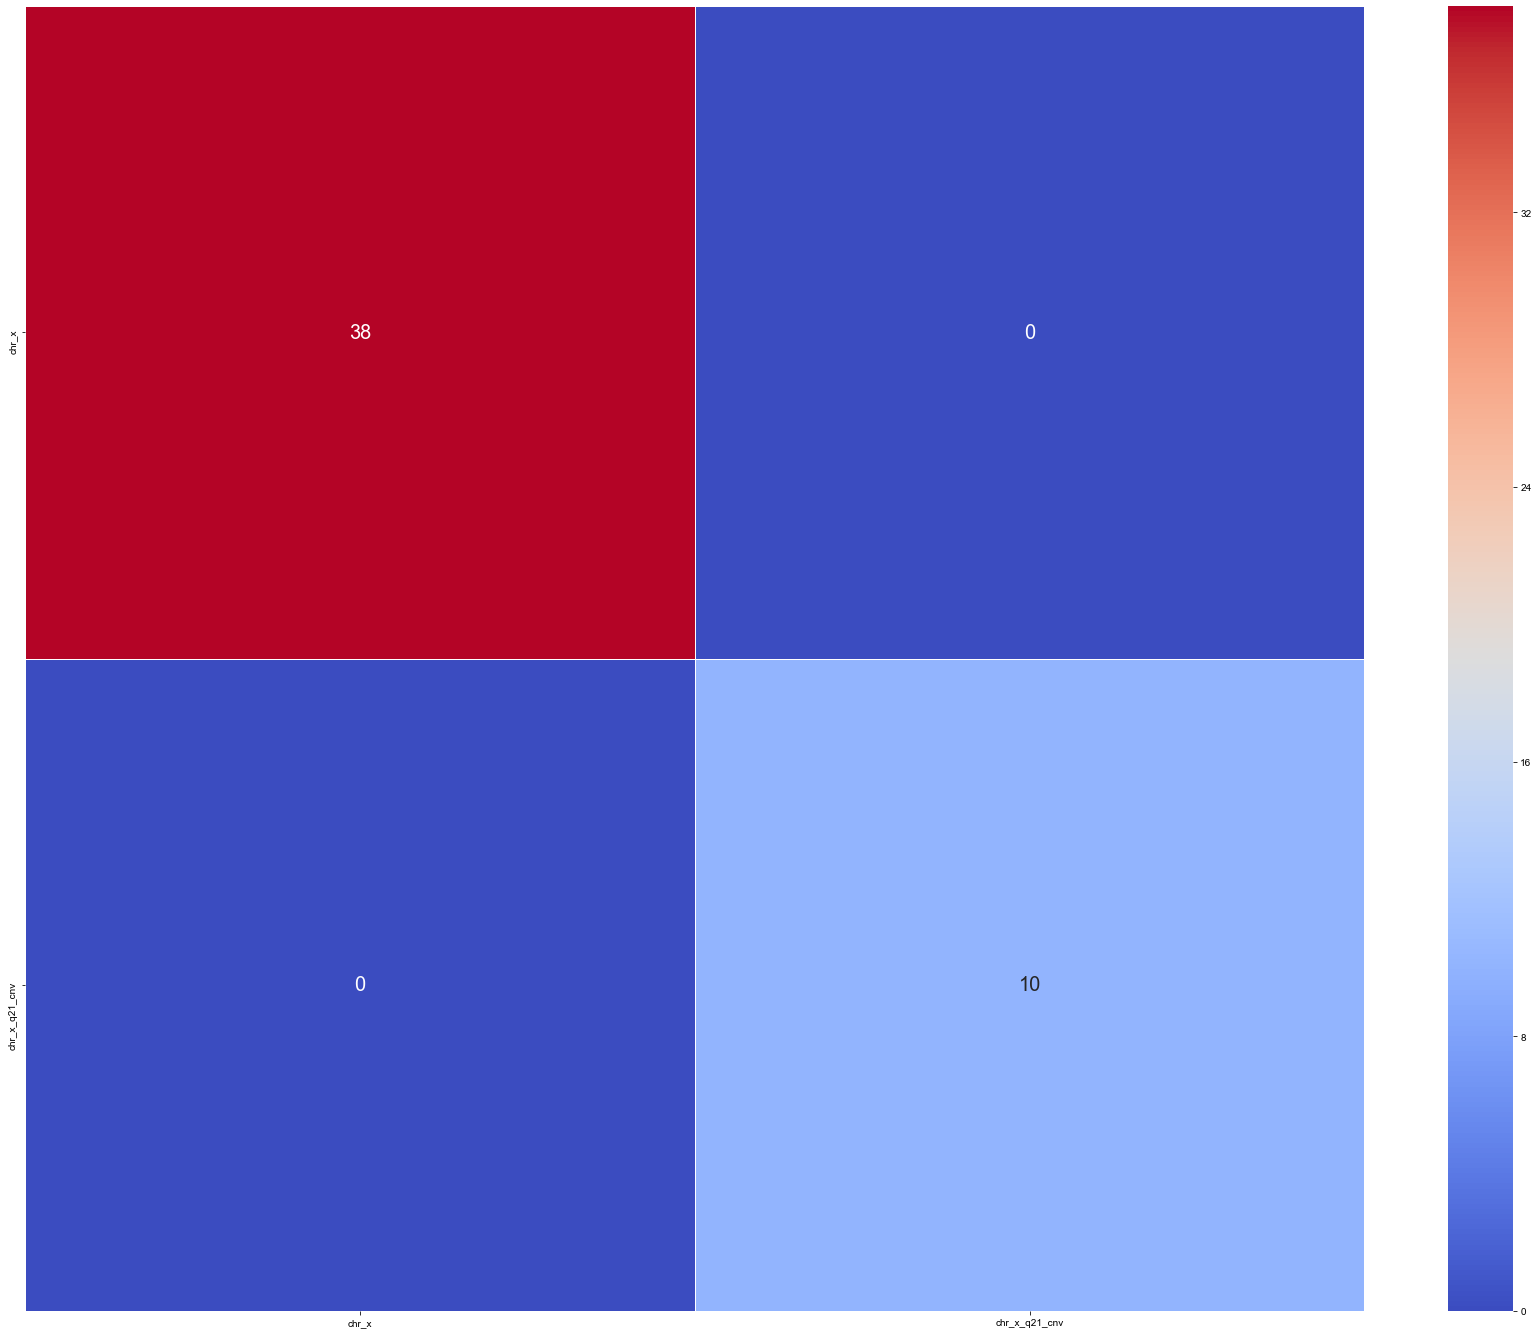

In [51]:
plt.figure(figsize=(30, 24))
heat_map = sb.heatmap(confusion, annot=True,  # It's a Seaborn function
                      cmap='coolwarm', 
                      xticklabels=confusion.columns, yticklabels=confusion.index, 
                      linewidths=.5, 
                      annot_kws={"size": 20})
sb.set(font_scale = 2)

In [52]:
fig = heat_map.get_figure()    
fig.savefig('Heatmap_Chr_X_Iteration_' + str(iterationNumber) + '.png', dpi=400)

### 3.10.4. ROC

In [53]:
y_predict

array([[1.0000000e+00, 1.0136647e-16],
       [1.0000000e+00, 1.1313930e-18],
       [1.0000000e+00, 7.3831146e-14],
       [1.0000000e+00, 8.4977813e-22],
       [1.0000000e+00, 6.6144056e-11],
       [1.0000000e+00, 9.5559411e-13],
       [1.0000000e+00, 2.3384333e-12],
       [1.0000000e+00, 2.0180031e-26],
       [9.9621385e-01, 7.8697153e-04],
       [1.0000000e+00, 7.0401379e-11],
       [1.0000000e+00, 8.4488430e-11],
       [1.0000000e+00, 4.4412356e-11],
       [1.0000000e+00, 5.8746629e-23],
       [1.0000000e+00, 1.1329963e-09],
       [1.0000000e+00, 3.4814487e-14],
       [1.0000000e+00, 4.3097124e-14],
       [1.0000000e+00, 2.3725833e-15],
       [1.0000000e+00, 4.6653004e-10],
       [9.9999511e-01, 5.1770201e-07],
       [9.9999964e-01, 1.5756527e-08],
       [9.9999988e-01, 8.1712610e-09],
       [9.9999988e-01, 4.3123221e-09],
       [9.9851447e-01, 4.5636922e-04],
       [9.9996912e-01, 4.8233369e-06],
       [9.9942940e-01, 1.6851274e-04],
       [9.9998665e-01, 1.

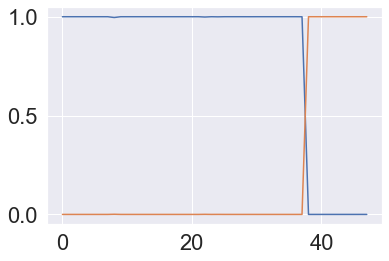

In [54]:
plt.plot(y_predict)

In [55]:
y_predict_1D = y_predict[:,0]

In [56]:
y_predict_1D_processed = 1- y_predict_1D

In [57]:
fpr , tpr , thresholds = roc_curve(y_test , y_predict_1D_processed)
auc_rf = auc(fpr, tpr)

In [58]:
auc_rf

1.0

In [59]:
x = y = np.arange(0,1.1,0.1)

In [60]:
x

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

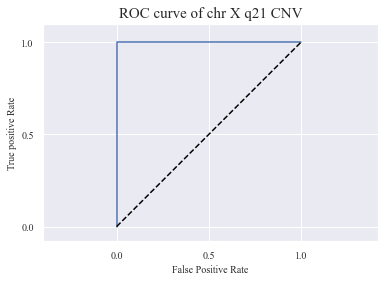

In [61]:
plt.plot(fpr, tpr)
plt.plot(x, y, '--', color='black')
plt.title('ROC curve of chr X q21 CNV', fontsize=15, fontname = 'Times New Roman')
plt.xlabel('False Positive Rate', fontsize=10, fontname = 'Times New Roman')
plt.ylabel('True positive Rate', fontsize=10, fontname = 'Times New Roman')
plt.axis('equal')
plt.xlim(-0.08, 1.1)
plt.ylim(-0.08, 1.1)
plt.xticks(fontsize=10, fontname = 'Times New Roman')
plt.yticks(fontsize=10, fontname = 'Times New Roman')

plt.savefig('ROC_Curve_Chr_X_' + str(iterationNumber) + '.png', dpi=400)
plt.show()

#### 3.10.4.1 AUC Value

In [62]:
auc_value = auc(fpr, tpr)

In [63]:
print('AUC is ', auc_value)

AUC is  1.0


# Results

In [64]:
print('Test Accuracy: %.3f' % acc)

Test Accuracy: 1.000


In [65]:
print(performanceReport)

               precision    recall  f1-score   support

        chr_x       1.00      1.00      1.00        38
chr_x_q21_cnv       1.00      1.00      1.00        10

    micro avg       1.00      1.00      1.00        48
    macro avg       1.00      1.00      1.00        48
 weighted avg       1.00      1.00      1.00        48



In [66]:
type(performanceReport)

str

In [67]:
confusion

,chr_x,chr_x_q21_cnv
chr_x,38,0
chr_x_q21_cnv,0,10


In [68]:
print('AUC is ', auc_value)

AUC is  1.0


## Export to a text file

In [69]:
file_report = open('Results'+str(iterationNumber)+'.txt', 'w')
file_report.write('Accuracy: %s\n\n' % acc)
file_report.write('AUC: %s.\n\n' % auc_value)
file_report.write('Performance Report: \n%s\n\n' % performanceReport)
file_report.write('Confusion Matrix: \n%s.\n\n' % confusion)
file_report.close()